# Model Building on a Synthetic Dataset

## Table Contents

* [Business Problem Statement](#business-problem-statement)
* [Objective](#objective)
* [Data Description](#data-description)
* [Exploratory Data Analysis](#exploratory-data-analysis)
* [Encoding](#encoding)
* [Missing Values](#missing-values)
* [Modeling](#modeling)

# Business Problem Statement

The challenge at hand involves the development of a predictive model using a training dataset (`codetest_train.txt`) comprising 5,000 records with 254 features plus 1 target variable (~7.8MB). The ultimate goal is to utilize this model to predict values for a separate test dataset (`codetest_test.txt`) consisting of 1,000 records with the same 254 features (~1.5MB).

The synthetic nature of the datasets ensures a consistent data model for both training and testing. The success of the model will be assessed through the mean squared error (MSE), reflecting the accuracy of predictions.

The business objective is to deploy a robust predictive model capable of generalizing patterns from the training data to make accurate predictions on the test data. This predictive capability can be leveraged for various applications, such as optimizing decision-making processes, resource allocation, or any scenario where accurate predictions based on given features are crucial for business outcomes.

![Image](https://d130b8xaedzatc.cloudfront.net/blog/how-to-build-machine-learning-model-for-beginners/What-is-ML-Model.webp)

# Objective

This notebook endeavors to create a predictive model utilizing a single training dataset. The objective is to forecast values for a separate test dataset. Both datasets are synthetically generated and adhere to the same data model. The evaluation of success will be based on the mean squared error (MSE).


# Data Description 

We have included two tab-delimited files in conjunction with these instructions:

- `codetest_train.txt`: 5,000 records x 254 features + 1 target (~7.8MB)
- `codetest_test.txt`: 1,000 records x 254 features (~1.5MB)


# Exploratory Data Analysis

The provided Python code utilizes the pandas library to manipulate data. It reads training and test datasets from 'codetest_train.txt' and 'codetest_test.txt' files, respectively, using tab ('\t') as the delimiter. The first few rows of the training data are then displayed and printed.


In [2]:
# Import the pandas library as pd for data manipulation
import pandas as pd

# Read training data from 'codetest_train.txt' file using tab ('\t') as the delimiter
training_dataset = pd.read_csv('./datasets/codetest_train.txt', delimiter='\t')

# Read test data from 'codetest_test.txt' file using tab ('\t') as the delimiter
testing_dataset = pd.read_csv('./datasets/codetest_test.txt', delimiter='\t')

# Display the first few rows of the training data
first_few_rows_training = training_dataset.head()

# Print the first few rows of the training data
(first_few_rows_training)


,target,f_0,f_1,f_2,f_3,f_4,f_5,f_6,f_7,f_8,...,f_244,f_245,f_246,f_247,f_248,f_249,f_250,f_251,f_252,f_253
0,3.066056,-0.653,0.255,-0.615,-1.833,-0.736,NaN,1.115,-0.171,-0.351,...,-1.607,-1.400,-0.920,-0.198,-0.945,-0.573,0.170,-0.418,-1.244,-0.503
1,-1.910473,1.179,-0.093,-0.556,0.811,-0.468,-0.005,-0.116,-1.243,1.985,...,1.282,0.032,-0.061,NaN,-0.061,-0.302,1.281,-0.850,0.821,-0.260
2,7.830711,0.181,-0.778,-0.919,0.113,0.887,-0.762,1.872,-1.709,0.135,...,-0.237,-0.660,1.073,-0.193,0.570,-0.267,1.435,1.332,-1.147,2.580
3,-2.180862,0.745,-0.245,-1.343,1.163,-0.169,-0.151,-1.100,0.225,1.223,...,0.709,-0.203,-0.136,-0.571,1.682,0.243,-0.381,0.613,1.033,0.400
4,5.462784,1.217,-1.324,-0.958,0.448,-2.873,-0.856,0.603,0.763,0.020,...,0.892,-0.433,-0.877,0.289,0.654,1.230,0.457,-0.754,-0.025,-0.931


In [4]:
# Summary statistics of the training data
training_dataset.describe()

,target,f_0,f_1,f_2,f_3,f_4,f_5,f_6,f_7,f_8,...,f_244,f_245,f_246,f_247,f_248,f_249,f_250,f_251,f_252,f_253
count,5000.000000,4903.000000,4928.000000,4908.000000,4910.000000,4907.000000,4912.000000,4897.000000,4904.000000,4893.000000,...,4910.000000,4883.000000,4914.000000,4894.000000,4902.000000,4886.000000,4900.000000,4921.000000,4904.000000,4904.000000
mean,1.143878,-0.000433,0.002564,0.028877,-0.005437,-0.006759,0.005569,0.001536,-0.001019,0.009744,...,0.013529,0.004941,0.023261,-0.018447,-0.009842,0.016958,-0.004947,0.016868,-0.001351,0.010334
std,5.259896,0.999739,0.997930,1.019337,0.990351,1.006293,0.995799,1.004624,0.997356,0.988310,...,1.001453,0.997330,0.996458,1.005000,0.989228,1.011331,0.991577,1.001358,1.003411,1.006896
min,-26.705570,-3.941000,-3.847000,-3.818000,-3.434000,-3.400000,-4.051000,-3.179000,-3.890000,-3.857000,...,-3.585000,-3.494000,-3.485000,-4.012000,-3.252000,-3.821000,-3.376000,-3.373000,-3.950000,-3.728000
25%,-2.034383,-0.673000,-0.685000,-0.651000,-0.655000,-0.685500,-0.660000,-0.672000,-0.679000,-0.662000,...,-0.665750,-0.676000,-0.661750,-0.692000,-0.663000,-0.647750,-0.679500,-0.647000,-0.695000,-0.677000
50%,1.166835,-0.011000,-0.003000,0.047500,0.003500,-0.007000,-0.008000,-0.003000,-0.021500,0.017000,...,0.026000,-0.028000,0.027000,-0.035000,-0.010500,0.002500,0.010000,0.020000,0.002500,0.015000
75%,4.439549,0.677000,0.674500,0.719000,0.668000,0.654000,0.649000,0.679000,0.670250,0.698000,...,0.671750,0.670000,0.702500,0.655000,0.651000,0.709750,0.660250,0.692000,0.672250,0.705250
max,26.347818,3.831000,3.996000,3.199000,4.962000,3.106000,4.296000,4.166000,3.798000,4.195000,...,3.365000,3.456000,3.881000,3.690000,3.629000,4.144000,3.873000,3.187000,3.724000,3.956000


The provided Python code employs the matplotlib and seaborn libraries for data visualization. It creates a histogram with kernel density estimation to visualize the distribution of the 'target' variable in the training dataset. The plot is displayed with a title, xlabel, and ylabel for better interpretation.


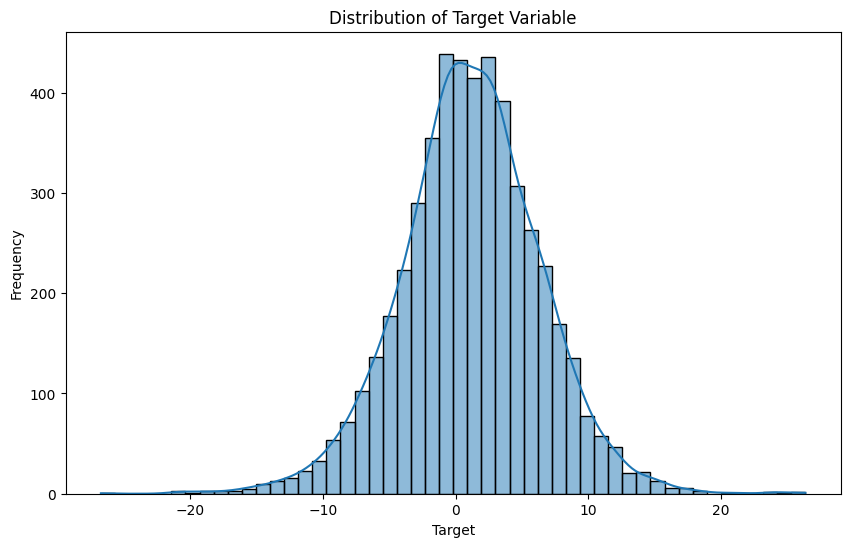

In [5]:
# Import required libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize the distribution of the target variable
plt.figure(figsize=(10, 6))

# Create a histogram with kernel density estimation for the 'target' variable in the training dataset
sns.histplot(training_dataset['target'], bins=50, kde=True)

# Set the title, xlabel, and ylabel for the plot
plt.title('Distribution of Target Variable')
plt.xlabel('Target')
plt.ylabel('Frequency')

# Display the plot
plt.show()


The provided Python code identifies columns with non-numeric data types in the training dataset. If there are any such columns, it prints the names of those columns; otherwise, it indicates that all columns have float or integer data types.


In [6]:
# Identify columns with non-numeric data types
non_numeric_columns = [col for col, dtype in training_dataset.dtypes.items() if dtype not in ['float64', 'int64']]

# Check if there are any columns with non-numeric data types
if non_numeric_columns:
    print(f"Columns with non-numeric data types: {non_numeric_columns}")
else:
    print("All columns have float or integer data types.")


Columns with non-numeric data types: ['f_61', 'f_121', 'f_215', 'f_237']


The provided Python code prints the first few rows of selected columns ('f_61', 'f_121', and 'f_215') from the training dataset. Additional columns can be included as needed by replicating the format for each desired column.


In [7]:
# Display the first few rows of selected columns in the training dataset
print("Column 'f_61':\n", training_dataset['f_61'].head())
print("\nColumn 'f_121':\n", training_dataset['f_121'].head())
print("\nColumn 'f_215':\n", training_dataset['f_215'].head())
# Add more columns as needed


Column 'f_61':
 0    b
1    a
2    b
3    a
4    b
Name: f_61, dtype: object

Column 'f_121':
 0    D
1    A
2    B
3    C
4    E
Name: f_121, dtype: object

Column 'f_215':
 0       red
1      blue
2    orange
3      blue
4    orange
Name: f_215, dtype: object



# Encoding

The provided Python code utilizes the `LabelEncoder` from scikit-learn to encode non-numeric features in the training dataset. It identifies non-numeric features, iterates through each feature, and transforms its values to numeric representation. Finally, it confirms that all features are now numeric by printing the data types of features that are not of type 'float64'.


In [8]:
from sklearn.preprocessing import LabelEncoder
# Identify non-numeric features in the training dataset
non_numeric_features = training_dataset.dtypes[training_dataset.dtypes == 'object'].index

# Encoding the non-numeric features using LabelEncoder
encoder = LabelEncoder()
for feature in non_numeric_features:
    training_dataset[feature] = encoder.fit_transform(training_dataset[feature].astype(str))

# Confirming that all features are now numeric
non_numeric_features_after_encoding = training_dataset.dtypes[training_dataset.dtypes != 'float64']
print(non_numeric_features_after_encoding)


f_61     int64
f_121    int64
f_215    int64
f_237    int64
dtype: object


The provided Python code prints the first few rows of selected columns ('f_61', 'f_121', and 'f_215') from the training dataset after encoding non-numeric features. Additional columns can be included as needed by replicating the format for each desired column.


In [9]:
# Display the first few rows of selected columns in the training dataset after encoding
print("Column 'f_61':\n", training_dataset['f_61'].head())
print("\nColumn 'f_121':\n", training_dataset['f_121'].head())
print("\nColumn 'f_215':\n", training_dataset['f_215'].head())
# Add more columns as needed


Column 'f_61':
 0    1
1    0
2    1
3    0
4    1
Name: f_61, dtype: int64

Column 'f_121':
 0    3
1    0
2    1
3    2
4    4
Name: f_121, dtype: int64

Column 'f_215':
 0    3
1    0
2    2
3    0
4    2
Name: f_215, dtype: int64


The provided Python code identifies columns with non-numeric data types in the testing dataset. If there are any such columns, it prints the names of those columns; otherwise, it indicates that all columns have float or integer data types.


In [10]:
# Identify columns with non-numeric data types in the testing dataset
non_numeric_cols = [col for col, dtype in testing_dataset.dtypes.items() if dtype not in ['float64', 'int64']]

# Check if there are any columns with non-numeric data types
if non_numeric_cols:
    print(f"Columns with non-numeric data types: {non_numeric_cols}")
else:
    print("All columns have float or integer data types.")


Columns with non-numeric data types: ['f_61', 'f_121', 'f_215', 'f_237']


The provided Python code identifies non-numeric features in the testing dataset by selecting columns with 'object' data type.


In [11]:
# Identify non-numeric features in the testing dataset
non_numeric_features_test = testing_dataset.dtypes[testing_dataset.dtypes == 'object'].index


The provided Python code utilizes the `LabelEncoder` from scikit-learn to encode non-numeric features in the testing dataset. It iterates through each feature, transforms its values to numeric representation, and confirms that all features are now numeric by printing the data types of features that are not of type 'float64'.


In [12]:
from sklearn.preprocessing import LabelEncoder

# Encoding the non-numeric features in the testing dataset
encoder = LabelEncoder()
for feature in non_numeric_features_test:
    testing_dataset[feature] = encoder.fit_transform(testing_dataset[feature].astype(str))

# Confirming that all features are now numeric in the testing dataset
non_numeric_features_after_encoding_test = testing_dataset.dtypes[testing_dataset.dtypes != 'float64']
print(non_numeric_features_after_encoding_test)


f_61     int64
f_121    int64
f_215    int64
f_237    int64
dtype: object



# Missing Values


The provided Python code checks for missing values in both the training and testing datasets. It prints the count of missing values for each column in the training and testing datasets, excluding columns with no missing values.


In [13]:
# Check missing values in the training dataset
missing_train = training_dataset.isna().sum()
print("Missing values in training_dataset:")
print(missing_train[missing_train > 0])

# Check missing values in the testing dataset
missing_test = testing_dataset.isna().sum()
print("\nMissing values in testing_dataset:")
print(missing_test[missing_test > 0])


Missing values in training_dataset:
f_0       97
f_1       72
f_2       92
f_3       90
f_4       93
        ... 
f_249    114
f_250    100
f_251     79
f_252     96
f_253     96
Length: 250, dtype: int64

Missing values in testing_dataset:
f_0      28
f_1      17
f_2      17
f_3      18
f_4      22
         ..
f_249    20
f_250    19
f_251    22
f_252    21
f_253    15
Length: 250, dtype: int64


The provided Python code fills missing values in both the training and testing datasets using the median value for each respective column. It iterates through each column, calculates the median, and replaces missing values with the computed median in-place.


In [14]:
# Filling missing values in the training dataset with median
for column in training_dataset.columns:
    median_value = training_dataset[column].median()
    training_dataset[column].fillna(median_value, inplace=True)

# Filling missing values in the testing dataset with median
for column in testing_dataset.columns:
    median_value = testing_dataset[column].median()
    testing_dataset[column].fillna(median_value, inplace=True)


After filling missing values with medians, the provided Python code rechecks for missing values in both the training and testing datasets. It prints the count of missing values for each column in the training and testing datasets, excluding columns with no missing values.


In [15]:
# Check missing values in the training dataset
missing_train = training_dataset.isna().sum()
print("Missing values in training_dataset:")
print(missing_train[missing_train > 0])

# Check missing values in the testing dataset
missing_test = testing_dataset.isna().sum()
print("\nMissing values in testing_dataset:")
print(missing_test[missing_test > 0])


Missing values in training_dataset:
Series([], dtype: int64)

Missing values in testing_dataset:
Series([], dtype: int64)



# Modeling

## LinearRegression

The provided Python code performs linear regression on the training dataset. It separates features and the target variable, splits the data into training and validation sets, and normalizes the features using StandardScaler. The linear regression model is initialized, fitted to the training data, and used to predict the target variable for the validation set. The mean squared error (MSE) is then calculated and printed as a performance metric.


In [17]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Separating features and target variable from training dataset
X = training_dataset.drop('target', axis=1)
y = training_dataset['target']

# Splitting the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalizing the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(testing_dataset)

# Initializing the model
lr_model = LinearRegression()

# Fitting the model to the training data
lr_model.fit(X_train_scaled, y_train)

# Making predictions on the validation set
y_val_pred = lr_model.predict(X_val_scaled)

# Calculating the mean squared error
mse = mean_squared_error(y_val, y_val_pred)
print("The MSE is ", mse)


The MSE is  14.010723344651982


The provided Python code utilizes a Random Forest Regressor for predicting the target variable on the validation set. The model is initialized, fitted to the training data, and used to make predictions on the validation set. The mean squared error (MSE) is then calculated and printed as a performance metric for the Random Forest model.


## RandomForestRegressor

In [18]:
# Import necessary libraries
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Assuming you've already separated features and target variable and normalized the features
# X_train_scaled, X_val_scaled, y_train, y_val are already defined

# Initializing the Random Forest model
rf_model = RandomForestRegressor(random_state=42)

# Fitting the model to the training data
rf_model.fit(X_train_scaled, y_train)

# Making predictions on the validation set
y_val_pred_rf = rf_model.predict(X_val_scaled)

# Calculating the mean squared error for Random Forest
mse_rf = mean_squared_error(y_val, y_val_pred_rf)
print("Mean Squared Error for Random Forest:", mse_rf)


Mean Squared Error for Random Forest: 12.025551828152306


The provided Python code extends the analysis to Lasso and Ridge regression models. It initializes and fits Lasso and Ridge models to the training data, makes predictions on the validation set, and calculates mean squared errors (MSE) for each. Additionally, it computes root mean squared errors (RMSE) for Linear Regression, Random Forest, Lasso, and Ridge models, storing the results in lists `mse_values_all` and `rmse_values_all`.


## Lasso & Ridge

In [19]:
# Import necessary libraries
import numpy as np
from sklearn.linear_model import Lasso, Ridge
from sklearn.metrics import mean_squared_error

# Assuming you've already initialized and fit Linear Regression, Random Forest, and have mse and mse_rf defined
# X_train_scaled, X_val_scaled, y_train, y_val are already defined

# Initializing the Lasso and Ridge models
lasso_model = Lasso(random_state=42)
ridge_model = Ridge(random_state=42)

# Fitting the Lasso and Ridge models to the training data
lasso_model.fit(X_train_scaled, y_train)
ridge_model.fit(X_train_scaled, y_train)

# Making predictions on the validation set for Lasso and Ridge models
y_val_pred_lasso = lasso_model.predict(X_val_scaled)
y_val_pred_ridge = ridge_model.predict(X_val_scaled)

# Calculating the MSE for Lasso and Ridge models
mse_lasso = mean_squared_error(y_val, y_val_pred_lasso)
mse_ridge = mean_squared_error(y_val, y_val_pred_ridge)

# Calculating the RMSE for Linear Regression, Random Forest, Lasso, and Ridge models
rmse_lr = np.sqrt(mse)
rmse_rf = np.sqrt(mse_rf)
rmse_lasso = np.sqrt(mse_lasso)
rmse_ridge = np.sqrt(mse_ridge)

# Storing MSE and RMSE values for all models in lists
mse_values_all = [mse, mse_rf, mse_lasso, mse_ridge]
rmse_values_all = [rmse_lr, rmse_rf, rmse_lasso, rmse_ridge]

mse_values_all, rmse_values_all


([14.010723344651982,
  12.025551828152306,
  18.001387093995596,
  14.010561607998667],
 [3.7430900796871, 3.4677877426613506, 4.242804154565185, 3.7430684749278456])

The provided Python code generates visual comparisons of Mean Squared Error (MSE) and Root Mean Squared Error (RMSE) for different regression models. It also displays R-squared values for Linear Regression and Random Forest models. The results are presented in a bar plot with a color palette for improved visualization.


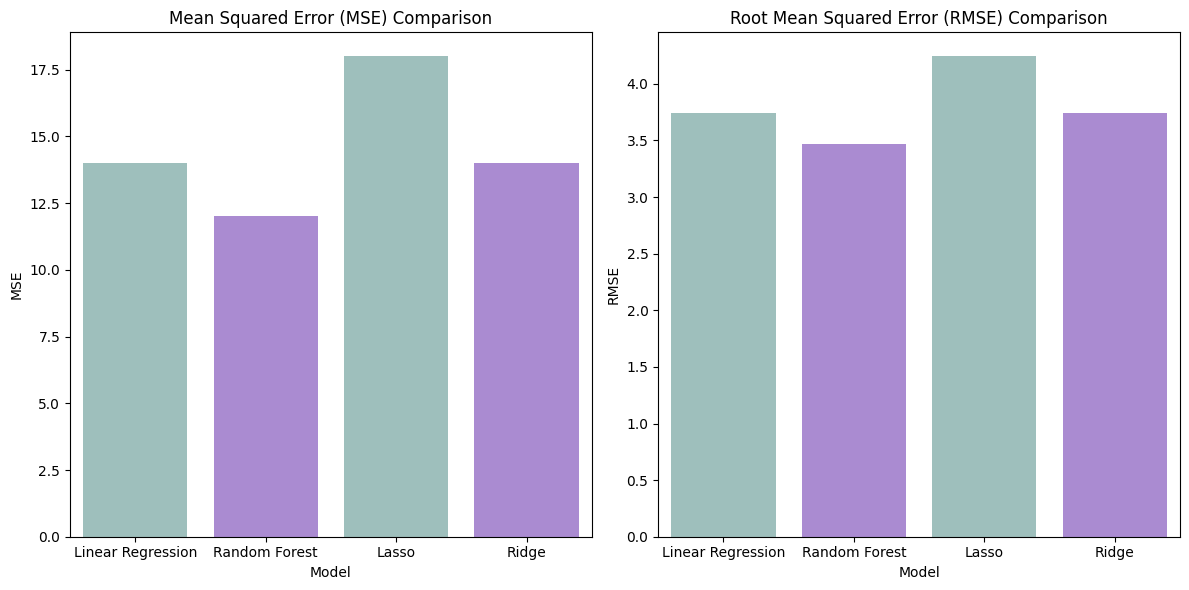

               Model  R-squared
0  Linear Regression   0.505427
1      Random Forest        NaN
2              Lasso        NaN
3              Ridge        NaN


In [21]:
# Import necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import r2_score


# Assuming you already have mse_values_all, rmse_values_all, and y_val_pred_lr, y_val_pred_rf defined
# Your color palette
color1 = '#98C5C0' # Light teal
color2 = '#A880DC' # Light purple

models_all = ['Linear Regression', 'Random Forest', 'Lasso', 'Ridge']

# Calculate R-squared for Linear Regression and Random Forest models
r2_lr = r2_score(y_val, y_val_pred)
r2_rf = r2_score(y_val, y_val_pred_rf)

# Add R-squared values to the list
r2_values_all = [r2_lr, None, None, None]  # Random Forest does not have Lasso and Ridge in this context

# Create a DataFrame for better visualization
results_df = pd.DataFrame({
    'Model': models_all,
    'MSE': mse_values_all,
    'RMSE': rmse_values_all,
    'R-squared': r2_values_all
})

# Plotting the results
plt.figure(figsize=(12, 6))

# Bar plot for MSE
plt.subplot(1, 2, 1)
sns.barplot(x='Model', y='MSE', data=results_df, palette=[color1, color2])
plt.title('Mean Squared Error (MSE) Comparison')

# Bar plot for RMSE
plt.subplot(1, 2, 2)
sns.barplot(x='Model', y='RMSE', data=results_df, palette=[color1, color2])
plt.title('Root Mean Squared Error (RMSE) Comparison')

# Display the plot
plt.tight_layout()
plt.show()

# Displaying R-squared values
print(results_df[['Model', 'R-squared']])
